# Import dependencies

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

In [3]:
data = np.loadtxt('../data/ex1data1.txt', delimiter=',', dtype=np.float64)

Recall <strong>X</strong> for matrix with ones in the first column.

In [4]:
X = np.c_[np.ones(data.shape[0]),data[:,0]]

In [5]:
X[:4,:] # print the first 5 rows

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032]])

In [6]:
y = np.c_[data[:,1]]

In [7]:
y[:4,:] # print the first 5 rows

array([[ 17.592 ],
       [  9.1302],
       [ 13.662 ],
       [ 11.854 ]])

In [8]:
X.shape

(97, 2)

In [9]:
y.shape

(97, 1)

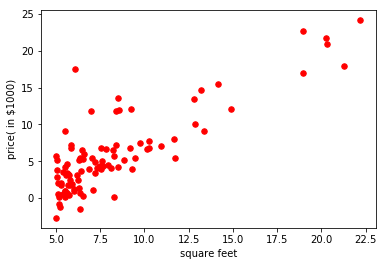

In [10]:
plt.scatter(X[:,1],y, s=30, c='r')
plt.xlabel('square feet')
plt.ylabel('price( in $1000)')
plt.show()

In [17]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    h = X.dot(theta)
    J = 1/(2*m)*np.sum(np.square(h-y))
    return(J)

In [18]:
computeCost(X,y)

32.072733877455676

In [19]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.0001, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*np.dot(X.T,h-y)
        J_history[iter] = computeCost(X, y, theta)
    return theta, J_history

theta:  [-0.02632385  0.80430136]


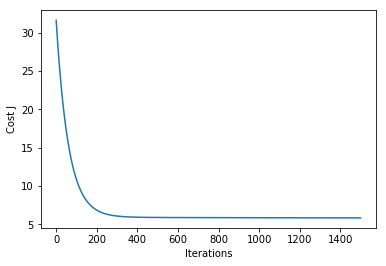

In [20]:
# theta for minimized cost J
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');
plt.show()

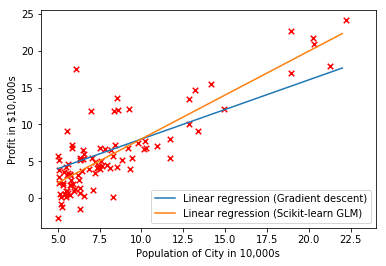

In [21]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);
plt.show()

# Question

Q1. Change theta to:  <strong>theta = theta - alpha*(1/m)*(x.T.dot(h-y))</strong> in the gradientDescent function.

In [ ]:
#theta = theta - alpha*(1/m)*(x.T.dot(h-y))

Q2. Compare the values of the model parameters after the change.